In [4]:
import numpy as np
import matplotlib.pyplot as plt

def createsample(mean, std_dev, numsamples):
    return np.random.normal(mean, std_dev, numsamples)
    #return cauchy.rvs(loc=mean, scale=scale, size=numsamples)



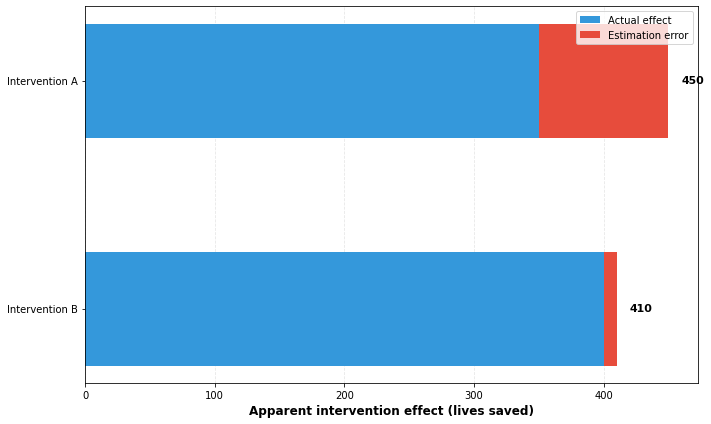

In [5]:
# Introductory curse demonstration



products = ['Intervention B', 'Intervention A']

# Price components for each product
actualeffect = [400,350]
error = [10, 100]


# Set up the bar positions
x = np.arange(len(products))
width = 0.5

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the stacked bars (horizontal)
bar1 = ax.barh(x, actualeffect, width, label='Actual effect', color='#3498db')
bar2 = ax.barh(x, error, width, left=actualeffect, label='Estimation error', color='#e74c3c')


# Customize the chart
ax.set_xlabel('Apparent intervention effect (lives saved)', fontsize=12, fontweight='bold')
ax.set_yticks(x)
ax.set_yticklabels(products)
ax.legend(loc='upper right')

# Add grid for better readability
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add total price labels at the end of each bar
totals = [sum(x) for x in zip(actualeffect, error)]
for i, total in enumerate(totals):
    ax.text(total + 10, i, f'{total}', va='center', fontweight='bold', fontsize=11)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the chart
plt.show()

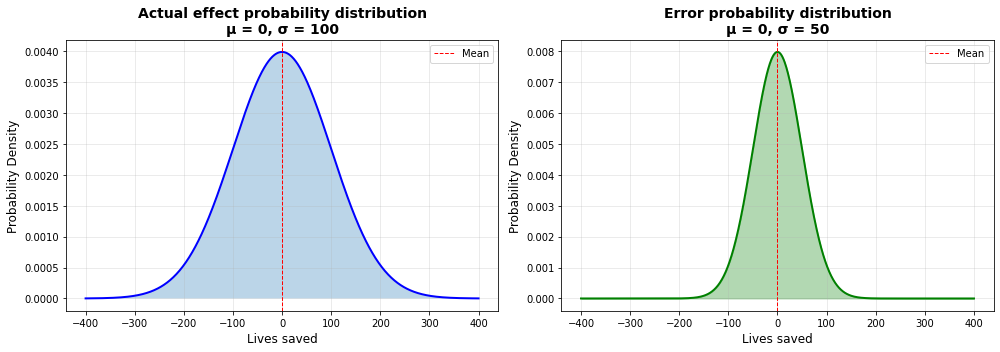

In [6]:
#Graph the PDFS of actual effects and errors.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create x values for plotting
x1 = np.linspace(-400, 400, 1000)
x2 = np.linspace(-400, 400, 1000)

# Calculate PDFs
pdf1 = norm.pdf(x1, loc=0, scale=100)
pdf2 = norm.pdf(x2, loc=0, scale=50)

# Create figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot first distribution (mean=0, std=100)
ax1.plot(x1, pdf1, 'b-', linewidth=2)
ax1.fill_between(x1, pdf1, alpha=0.3)
ax1.set_xlabel('Lives saved', fontsize=12)
ax1.set_ylabel('Probability Density', fontsize=12)
ax1.set_title('Actual effect probability distribution\nμ = 0, σ = 100', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=0, color='r', linestyle='--', linewidth=1, label='Mean')
ax1.legend()

# Plot second distribution (mean=0, std=50)
ax2.plot(x2, pdf2, 'g-', linewidth=2)
ax2.fill_between(x2, pdf2, alpha=0.3, color='g')
ax2.set_xlabel('Lives saved', fontsize=12)
ax2.set_ylabel('Probability Density', fontsize=12)
ax2.set_title('Error probability distribution\nμ = 0, σ = 50', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axvline(x=0, color='r', linestyle='--', linewidth=1, label='Mean')
ax2.legend()

plt.tight_layout()

plt.show()

(349.63680123043076, 231.36454097394932, False)

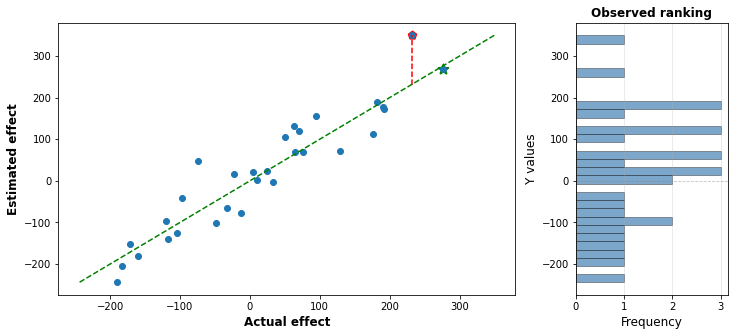

In [7]:

# Original case of estimation


def createsample(mean, std_dev, numsamples):
    return np.random.normal(mean, std_dev, numsamples)
np.random.seed(34452)
def onerun(num_interv,plotgraph=False):
    
    actual_mean = 0
    actual_std_dev = 100
    
    error_mean = 0
    error_std_dev = 50
    
    #might be easiest to remove sorted when doing the speculative
    
    interv_effs = sorted(createsample(actual_mean, actual_std_dev, num_interv)) #generate actual intervention 
    errors = createsample(error_mean, error_std_dev, num_interv) #generate errors for each
    est_effs = interv_effs+errors  # estimated effect
    
    
    top_charity_index = np.argmax(est_effs)
    actual_top_charity_index = np.argmax(interv_effs)


    if plotgraph==True:
        fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 5), 
                                gridspec_kw={'width_ratios': [3, 1]})
        
        ax.scatter(interv_effs[top_charity_index], est_effs[top_charity_index], 
                        s=60, marker='p', color='red',  linewidth=2,
                        label='Selected "Best"')#,zorder=5
        
        ax.scatter(interv_effs[actual_top_charity_index], est_effs[actual_top_charity_index], 
                        s=100, marker='*', color='green', linewidth=2,
                        label='Selected "Best"')        
        #print("top scorer",bestintindex, interv_effs[bestintindex],est_effs[bestintindex])
        
        ax.vlines(x = interv_effs[top_charity_index], ymin = interv_effs[top_charity_index], ymax = est_effs[top_charity_index], color = 'r',label = 'axvline - partial height',linestyle='--')   
        ax.scatter(interv_effs,est_effs)
        
        linelimhi = max(est_effs)
        linelimlow = min(est_effs)
        
        min_val = linelimhi
        max_val = linelimlow
        ax.plot([min_val, max_val], [min_val, max_val], linestyle='--',color="green") 
        #ax.set_title('Intervention ranking', fontweight='bold', fontsize=12)
        ax.set_xlabel('Actual effect', fontweight='bold', fontsize=12)
        ax.set_ylabel('Estimated effect', fontweight='bold', fontsize=12)
        
        
        ax2.hist(est_effs, bins=30, orientation='horizontal', alpha=0.7, 
        color='steelblue', edgecolor='black', linewidth=0.5)
        ax2.set_xlabel('Frequency', fontsize=12)
        ax2.set_ylabel('Y values', fontsize=12)
        ax2.set_title('Observed ranking', fontsize=12, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='x')
        ax2.axhline(y=0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
    
    top_charity_index = np.argmax(est_effs)
    top_charity_esteff=est_effs[top_charity_index]
    top_charity_acteff=interv_effs[top_charity_index]
    
    
    top_charity_acteff=interv_effs[top_charity_index]
    is_top_correct = (top_charity_index == np.argmax(interv_effs)) # Checks if top charity is the actual top charity
    #print(is_top_correct)
    #print("overestimate is ",top_charity_esteff-top_charity_acteff)
    
    return(top_charity_esteff,top_charity_acteff,is_top_correct)
    
    #plt.legend()
num_interv = 30
onerun(num_interv,True)

46.436332804484024 25.463740074025885


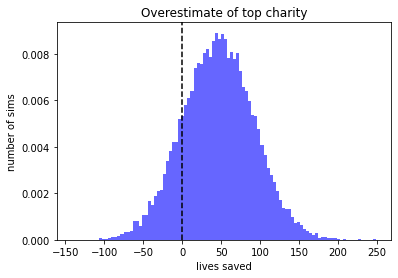

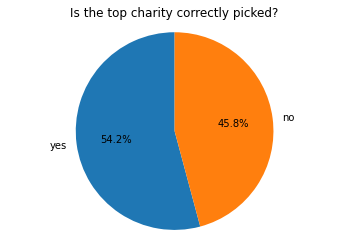

In [8]:
# Overestimate calculation


overestimatelist = []
overestimatepercentagelist = []
Truetally = 0

num_interv = 30


num_runs = 20000
for i in range(0,num_runs ):
    top_charity_esteff,top_charity_acteff,is_top_correct = onerun(num_interv)
    overestimate = top_charity_esteff-top_charity_acteff
    overestimatelist.append(overestimate)
    overestimatepercentagelist.append(100*overestimate/top_charity_acteff)
    if is_top_correct == True:
        Truetally +=1


plt.hist(overestimatelist, bins=100, density=True, alpha=0.6, color='b')
#plt.xlim(0, 500)

plt.axvline(x=0, color='k', linestyle='--', label='Vertical Line at x=10')

plt.title('Overestimate of top charity')

plt.xlabel('lives saved')
plt.ylabel('number of sims')

print(np.median(overestimatelist),np.median(overestimatepercentagelist))


values = [Truetally,num_runs-Truetally]
labels = ['yes', 'no']

# Create pie chart
plt.figure()
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Is the top charity correctly picked?')

# Ensure pie is drawn as a circle
plt.axis('equal')

plt.show()    

# median of a 25% of overestimate

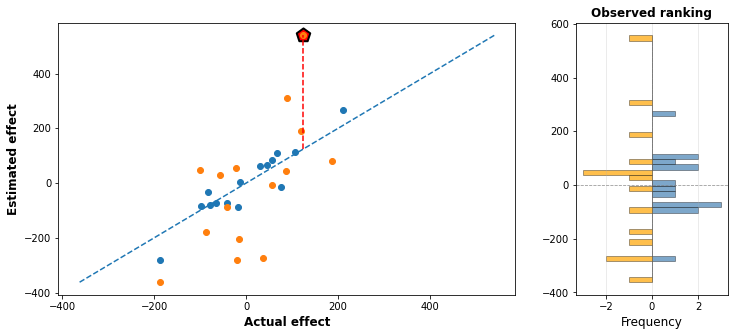

In [9]:
# Speculative comparison


def createsample(mean, std_dev, numsamples):
    return np.random.normal(mean, std_dev, numsamples)
    

np.random.seed(38731)

def onerunwithspec(num_interv,spec_error_std_dev,plotgraph=True):



    actual_mean = 0
    actual_std_dev = 100
    error_mean = 0
    error_std_dev = 50
    
    
    interv_effs = sorted(createsample(actual_mean, actual_std_dev, num_interv)) #generate actual intervention 
    errors = createsample(error_mean, error_std_dev, num_interv) #generate errors for each
    est_effs = interv_effs+errors  # estimated effect
    
    
    actual_mean = 0
    actual_std_dev = 100
    spec_error_mean = 0
    
    
    spec_interv_effs = sorted(np.random.normal(actual_mean, actual_std_dev, num_interv)) #generate actual intervention 
    spec_errors = np.random.normal(spec_error_mean, spec_error_std_dev, num_interv) #generate errors for each
    spec_est_effs = spec_interv_effs+spec_errors  # estimated effect
    
    

    if plotgraph == True: 
        fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 5), 
                                gridspec_kw={'width_ratios': [3, 1]})
        bestintindex = np.argmax(spec_est_effs)
        ax.scatter(spec_interv_effs[bestintindex], spec_est_effs[bestintindex], 
                        s=200, marker='p', color='red', edgecolor='black', linewidth=2,
                        label='Selected "Best"')#,zorder=5
        ax.vlines(x = spec_interv_effs[bestintindex], ymin = spec_interv_effs[bestintindex], ymax = spec_est_effs[bestintindex], color = 'r',label = 'axvline - partial height',linestyle='--')
        ax.scatter(interv_effs,est_effs)
        ax.scatter(spec_interv_effs,spec_est_effs)
        
        linelimhi = max(spec_est_effs)
        linelimlow = min(spec_est_effs)
        
        min_val = linelimhi
        max_val = linelimlow
        ax.plot([min_val, max_val], [min_val, max_val], linestyle='--')
    
        #ax.set_title('Estimate of top charity')
        ax.set_xlabel('Actual effect', fontsize=12, fontweight='bold')
        ax.set_ylabel('Estimated effect', fontsize=12, fontweight='bold')
        
        bin_width = 20
        bins = np.arange(np.min([est_effs, spec_est_effs]),
                    np.max([est_effs, spec_est_effs]) + bin_width, bin_width)
        
        ax2.hist(est_effs, bins=bins, orientation='horizontal', alpha=0.7, 
        color='steelblue', edgecolor='black', linewidth=0.5)
        ax2.set_xlabel('Frequency', fontsize=12)

        ax2.set_title('Observed ranking', fontsize=12, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='x')
        
        
        ax2.hist(spec_est_effs, bins=bins, orientation='horizontal',weights=-np.ones_like(spec_est_effs), alpha=0.7, 
        color='orange', edgecolor='black', linewidth=0.5)
        ax2.set_title('Observed ranking', fontsize=12, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='x')
        ax2.axhline(y=0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
        
        ax2.axhline(y=0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)

    
    top_charity_index = np.argmax(est_effs)
    top_charity_esteff=est_effs[top_charity_index]
    top_charity_acteff=interv_effs[top_charity_index]
    overestimate = top_charity_esteff-top_charity_acteff
    top_charity_acteff=interv_effs[top_charity_index]
    
    spec_top_charity_index = np.argmax(spec_est_effs)
    spec_top_charity_esteff=spec_est_effs[spec_top_charity_index]
    spec_top_charity_acteff=spec_interv_effs[spec_top_charity_index]
    spec_overestimate = spec_top_charity_esteff-top_charity_acteff
    spec_top_charity_acteff=spec_interv_effs[spec_top_charity_index]
    
    #return(top_charity_index,top_charity_esteff,top_charity_acteff,100*overestimate/top_charity_acteff)
    return(top_charity_esteff,top_charity_acteff,spec_top_charity_esteff,spec_top_charity_acteff)

#spec_error_std_dev = 500
num_interv = 15
spec_error_std_dev = 200


top_charity_esteff,top_charity_acteff,spec_top_charity_esteff,spec_top_charity_acteff = onerunwithspec(num_interv,spec_error_std_dev)




nonspec, spec 154.62108619982334 77.97589774038381
num_runs,False_spec_tally,False_nonspec_tally 10000 6810 41
46.436332804484024


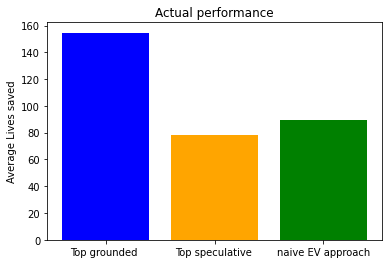

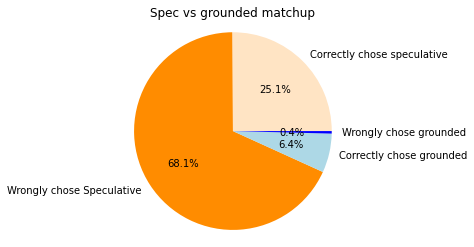

In [10]:
nonspec_lives_saved = 0
spec_lives_saved = 0
False_spec_tally = 0
False_nonspec_tally = 0
True_spec_tally =0
True_nonspec_tally=0

Actual_effects_reg = []
Actual_effects_spec = []
naiveEV_lives_saved = 0



num_runs = 10000
spec_error_std_dev = 200
num_interv = 15
#spec_error_std_dev = 500

for i in range(0,num_runs):
    top_charity_esteff,top_charity_acteff,spec_top_charity_esteff,spec_top_charity_acteff = onerunwithspec(num_interv,spec_error_std_dev,False)
    specwinsapparent = (spec_top_charity_esteff>top_charity_esteff)
    specwinsactual = (spec_top_charity_acteff>top_charity_acteff)
    #print(specwinsapparent,specwinsactual)
    if specwinsapparent and not specwinsactual:  # tally correctness of each approach
        False_spec_tally += 1
    elif not specwinsapparent and specwinsactual:
        False_nonspec_tally += 1
    elif specwinsapparent and  specwinsactual:
        True_spec_tally += 1
    elif not specwinsapparent and not  specwinsactual:
        True_nonspec_tally += 1
    nonspec_lives_saved += top_charity_acteff
    spec_lives_saved += spec_top_charity_acteff
    if specwinsapparent:  # calculate the naive EV approach
        naiveEV_lives_saved+=spec_top_charity_acteff
    else:
        naiveEV_lives_saved+=top_charity_acteff
    
    Actual_effects_reg.append(top_charity_acteff)
    Actual_effects_spec.append(spec_top_charity_acteff)

    
print("nonspec, spec",nonspec_lives_saved/num_runs,spec_lives_saved/num_runs)
print("num_runs,False_spec_tally,False_nonspec_tally",num_runs,False_spec_tally,False_nonspec_tally)


plt.bar(["Top grounded ","Top speculative ","naive EV approach"],[nonspec_lives_saved/num_runs,spec_lives_saved/num_runs,naiveEV_lives_saved/num_runs],color=["blue","orange","green"])

plt.title('Actual performance')

#plt.xlabel('lives saved')
plt.ylabel('Average Lives saved')

print(np.median(overestimatelist))


values = [True_spec_tally,False_spec_tally,True_nonspec_tally,False_nonspec_tally]
labels = ['Correctly chose speculative', 'Wrongly chose Speculative','Correctly chose grounded','Wrongly chose grounded']


# Create pie chart
plt.figure()
plt.pie(values, labels=labels, autopct='%1.1f%%',colors=["bisque","darkorange","lightblue","blue"]) #, startangle=50
plt.title('Spec vs grounded matchup')

# Ensure pie is drawn as a circle
plt.axis('equal')

plt.show()


# takeaways: the nonspec is almost twice as effective. 

# this is the case with at least two of each

(264.77619413298714,
 198.80936553876273,
 False,
 211.82095530638972,
 198.80936553876273)

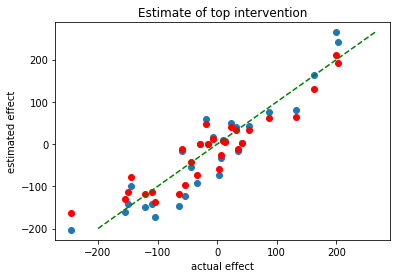

In [11]:
#  Now, we implement the bayesian correction

def downweight(est_effs,alphai):
    prior=0  # prior estimate of effectivness
    adjusted_est_effs = []
    for est_effect in est_effs:
        adjusted_estimate = alphai*est_effect+(1-alphai)*prior
        adjusted_est_effs.append(adjusted_estimate)
    return(adjusted_est_effs)


# start of actual text: a regular case of overestimation

#np.random.seed(34452)
def onerunadjusted(num_interv,error_std_dev,plotgraph=True):
    def createsample(mean, std_dev, numsamples):
        return np.random.normal(mean, std_dev, numsamples)
    
    actual_mean = 0
    actual_std_dev = 100
    error_mean = 0

    
    interv_effs = sorted(createsample(actual_mean, actual_std_dev, num_interv)) #generate actual intervention 
    errors = createsample(error_mean, error_std_dev, num_interv) #generate errors for each
    est_effs = interv_effs+errors  # estimated effect
    
    
    top_charity_index = np.argmax(est_effs)
    actual_top_charity_index = np.argmax(interv_effs)
    
    spread_ratio = error_std_dev/actual_std_dev
    alphai = 1/(1+spread_ratio**2)#Taken from the paper
    Adjusted_est_effs =   downweight(est_effs,alphai)

    if plotgraph==True:
        fig,ax = plt.subplots()
        
        ax.scatter(interv_effs,est_effs)
        ax.scatter(interv_effs,Adjusted_est_effs,color="red")

        
        linelimhi = max(est_effs)
        linelimlow = min(est_effs)
        
        min_val = linelimhi
        max_val = linelimlow
        ax.plot([min_val, max_val], [min_val, max_val], linestyle='--',color="green") 
        ax.set_title('Estimate of top intervention')
        ax.set_xlabel('actual effect')
        ax.set_ylabel('estimated effect')
    originalerror=0
    adjustederror=0
    for i in range(0,len(est_effs)):
        originalerror += est_effs[i]-interv_effs[i]
        adjustederror += Adjusted_est_effs[i]-interv_effs[i]
    
    top_charity_index = np.argmax(est_effs)
    top_charity_esteff=est_effs[top_charity_index]
    top_charity_acteff=interv_effs[top_charity_index]
    
    adj_top_charity_index = np.argmax(est_effs)
    adj_top_charity_esteff=Adjusted_est_effs[top_charity_index]
    adj_top_charity_acteff=interv_effs[top_charity_index]
    
    
    top_charity_acteff=interv_effs[top_charity_index]
    is_top_correct = (adj_top_charity_index == np.argmax(interv_effs)) # Checks if top charity is the actual top charity
    #print(is_top_correct)
    #print("overestimate is ",adj_top_charity_esteff-top_charity_acteff)
    #print(originalerror,adjustederror)
    
    return(top_charity_esteff,top_charity_acteff,is_top_correct,adj_top_charity_esteff,adj_top_charity_acteff)
    
    #plt.legend()
num_interv= 30
error_std_dev = 50
onerunadjusted(num_interv,error_std_dev)



# NOte: the Vis were of the variance of errors, not the variance of estimation. 



363.46154709979254


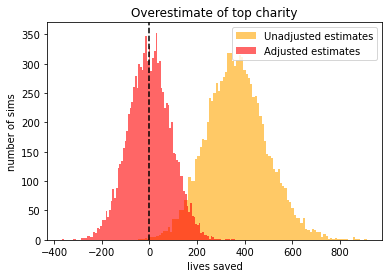

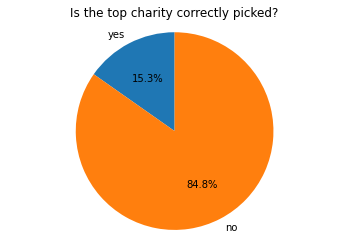

In [12]:

overestimatelist = []
adj_overestimatelist = []
Truetally = 0

num_runs = 10000

num_interv=30
error_std_dev = 200  # for grounded, this is 50, for spec it's 200

for i in range(0,num_runs ):
    top_charity_esteff,top_charity_acteff,is_top_correct,adj_top_charity_esteff,adj_top_charity_acteff = onerunadjusted(num_interv,error_std_dev,False)
    overestimate = top_charity_esteff-top_charity_acteff
    overestimateadjusted = adj_top_charity_esteff-adj_top_charity_acteff
    #overestimate = 100*(top_charity_esteff-top_charity_acteff)/top_charity_acteff
    overestimatelist.append(overestimate)
    adj_overestimatelist.append(overestimateadjusted)
    if is_top_correct == True:
        Truetally +=1
#print(Truetally)
# Data


plt.hist(overestimatelist, bins=100, alpha=0.6, color='orange', label='Unadjusted estimates')
plt.hist(adj_overestimatelist, bins=100, alpha=0.6, color='red', label='Adjusted estimates')

#plt.xlim(0, 500)

plt.axvline(x=0, color='k', linestyle='--')

plt.title('Overestimate of top charity')

plt.xlabel('lives saved')
plt.ylabel('number of sims')
plt.legend()
print(np.median(overestimatelist))


values = [Truetally,num_runs-Truetally]
labels = ['yes', 'no']

# Create pie chart
plt.figure()
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Is the top charity correctly picked?')


# Ensure pie is drawn as a circle
plt.axis('equal')

plt.show()    

In [13]:
# stdev of 50: we get 0.8
# stedev of 150 we get 0.3
# stdev of 500 we get 0.05




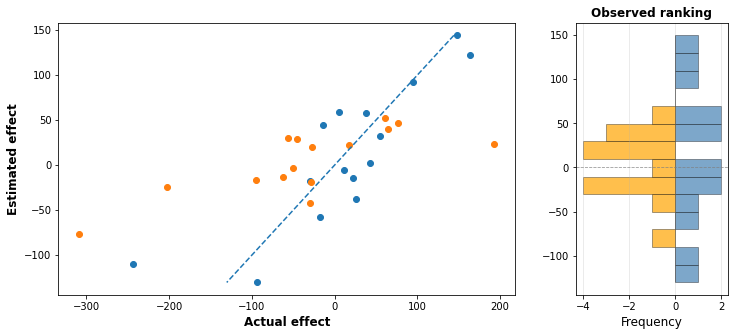

In [14]:
# Comparison of speculative and grounded, with bayesian downweighting
#np.random.seed(38739)


def downweight(est_effs,alphai):
    prior=0
    adjusted_est_effs = []
    for est_effect in est_effs:
        adjusted_estimate = alphai*est_effect+(1-alphai)*prior
        adjusted_est_effs.append(adjusted_estimate)
    return(adjusted_est_effs)

def onerunwithspec(spec_error_std_dev,plotgraph=True):

    def createsample(mean, std_dev, numsamples):
        return np.random.normal(mean, std_dev, numsamples)
    
    #
    
    #num_interv = 100
    num_interv = 15
    
    actual_mean = 0
    actual_std_dev = 100
    
    error_mean = 0
    error_std_dev = 50
    
    alphai_grounded = 1/(1+(error_std_dev/actual_std_dev)**2)#Taken from the paper

    #might be easiest to remove sorted when doing the speculative
    
    interv_effs = sorted(createsample(actual_mean, actual_std_dev, num_interv)) #generate actual intervention 
    errors = createsample(error_mean, error_std_dev, num_interv) #generate errors for each
    est_effs = interv_effs+errors  # estimated effect
    
    est_effs=downweight(est_effs,alphai_grounded)
    
    
    actual_mean = 0
    actual_std_dev = 100
    
    spec_error_mean = 0
    
    #might be easiest to remove sorted when doing the speculative
    
    spec_interv_effs = sorted(np.random.normal(actual_mean, actual_std_dev, num_interv)) #generate actual intervention 
    
    # TEST WHERE BOTH ARE THE SAME:
    #spec_interv_effs = interv_effs
    
    spec_errors = np.random.normal(spec_error_mean, spec_error_std_dev, num_interv) #generate errors for each
    spec_est_effs = spec_interv_effs+spec_errors  # estimated effect
    
    alphai_spec = 1/(1+(spec_error_std_dev/actual_std_dev)**2)#Taken from the paper

    spec_est_effs=downweight(spec_est_effs,alphai_spec)
    

    #estimatestdev = np.sqrt(actual_std_dev**2 + error_std_dev**2)
    #print("stdis = ",estimatestdev, np.std(est_effs))
    
    if plotgraph == True: 
        fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 5), 
                                gridspec_kw={'width_ratios': [3, 1]})
        bestintindex = np.argmax(spec_est_effs)
        ax.scatter(interv_effs,est_effs)
        ax.scatter(spec_interv_effs,spec_est_effs)
        
        
        
        linelimhi = max(est_effs)
        linelimlow = min(est_effs)
        
        min_val = linelimhi
        max_val = linelimlow
        ax.plot([min_val, max_val], [min_val, max_val], linestyle='--')
    
        #ax.set_title('Estimate of top charity')
        ax.set_xlabel('Actual effect', fontsize=12, fontweight='bold')
        ax.set_ylabel('Estimated effect', fontsize=12, fontweight='bold')
        
        bin_width = 20
        bins = np.arange(np.min([est_effs, spec_est_effs]),
                    np.max([est_effs, spec_est_effs]) + bin_width, bin_width)
        
        ax2.hist(est_effs, bins=bins, orientation='horizontal', alpha=0.7, 
        color='steelblue', edgecolor='black', linewidth=0.5)
        ax2.set_xlabel('Frequency', fontsize=12)

        ax2.set_title('Observed ranking', fontsize=12, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='x')
        
        
        ax2.hist(spec_est_effs, bins=bins, orientation='horizontal',weights=-np.ones_like(spec_est_effs), alpha=0.7, 
        color='orange', edgecolor='black', linewidth=0.5)
        ax2.set_title('Observed ranking', fontsize=12, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='x')
        ax2.axhline(y=0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
        
        ax2.axhline(y=0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)

    
    top_charity_index = np.argmax(est_effs)
    top_charity_esteff=est_effs[top_charity_index]
    top_charity_acteff=interv_effs[top_charity_index]
    overestimate = top_charity_esteff-top_charity_acteff
    top_charity_acteff=interv_effs[top_charity_index]
    
    spec_top_charity_index = np.argmax(spec_est_effs)
    spec_top_charity_esteff=spec_est_effs[spec_top_charity_index]
    spec_top_charity_acteff=spec_interv_effs[spec_top_charity_index]
    spec_overestimate = spec_top_charity_esteff-top_charity_acteff
    spec_top_charity_acteff=spec_interv_effs[spec_top_charity_index]
    
    #return(top_charity_index,top_charity_esteff,top_charity_acteff,100*overestimate/top_charity_acteff)
    return(top_charity_esteff,top_charity_acteff,spec_top_charity_esteff,spec_top_charity_acteff)

#spec_error_std_dev = 500

#spec_error_std_dev = 200
spec_error_std_dev = 200


top_charity_esteff,top_charity_acteff,spec_top_charity_esteff,spec_top_charity_acteff = onerunwithspec(spec_error_std_dev)




nonspec, spec,EV 155.50240772005694 77.97746649783882 157.228816245219
num_runs,False_spec_tally,False_nonspec_tally 10000 278


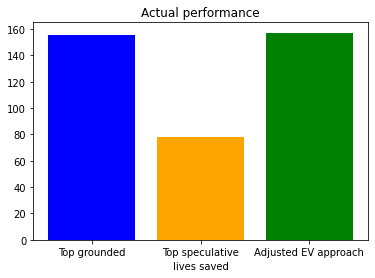

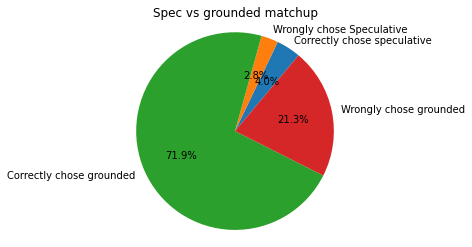

In [15]:
nonspec_lives_saved = 0
spec_lives_saved = 0
False_spec_tally = 0
False_nonspec_tally = 0
True_spec_tally =0
True_nonspec_tally=0

Actual_effects_reg = []
Actual_effects_spec = []

naiveEV_lives_saved=0


num_runs = 10000
#spec_error_std_dev = 150
spec_error_std_dev = 200

for i in range(0,num_runs):
    top_charity_esteff,top_charity_acteff,spec_top_charity_esteff,spec_top_charity_acteff = onerunwithspec(spec_error_std_dev,False)
    specwinsapparent = (spec_top_charity_esteff>top_charity_esteff)
    specwinsactual = (spec_top_charity_acteff>top_charity_acteff)
    #print(specwinsapparent,specwinsactual)
    if specwinsapparent and not specwinsactual:
        False_spec_tally += 1
    elif not specwinsapparent and specwinsactual:
        False_nonspec_tally += 1
    elif specwinsapparent and  specwinsactual:
        True_spec_tally += 1
    elif not specwinsapparent and not  specwinsactual:
        True_nonspec_tally += 1
    nonspec_lives_saved += top_charity_acteff
    spec_lives_saved += spec_top_charity_acteff
    
    if specwinsapparent:
        naiveEV_lives_saved+=spec_top_charity_acteff
    else:
        naiveEV_lives_saved+=top_charity_acteff
    Actual_effects_reg.append(top_charity_acteff)
    Actual_effects_spec.append(spec_top_charity_acteff)
    
print("nonspec, spec,EV",nonspec_lives_saved/num_runs,spec_lives_saved/num_runs,naiveEV_lives_saved/num_runs)
print("num_runs,False_spec_tally,False_nonspec_tally",num_runs,False_spec_tally)



plt.bar(["Top grounded","Top speculative","Adjusted EV approach"],[nonspec_lives_saved/num_runs,spec_lives_saved/num_runs,naiveEV_lives_saved/num_runs],color=["blue","orange","green"])

plt.title('Actual performance')

plt.xlabel('lives saved')
#plt.ylabel('Average Lives saved')



values = [True_spec_tally,False_spec_tally,True_nonspec_tally,False_nonspec_tally]
labels = ['Correctly chose speculative', 'Wrongly chose Speculative','Correctly chose grounded','Wrongly chose grounded']


# Create pie chart
plt.figure()
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=50)
plt.title('Spec vs grounded matchup')

# Ensure pie is drawn as a circle
plt.axis('equal')

plt.show()


# takeaways: the nonspec is almost twice as effective. 

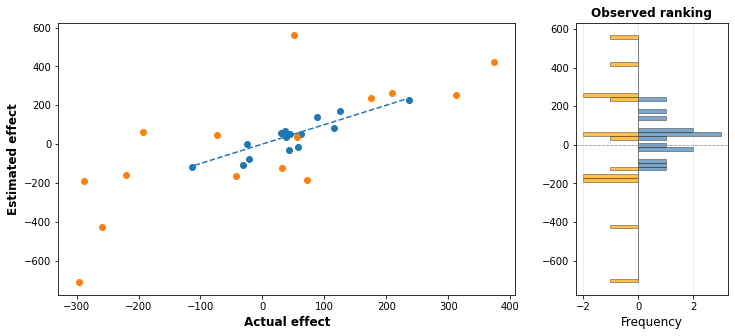

nonspec, spec 155.12617037061767 121.68441942680955
num_runs,False_spec_tally,False_nonspec_tally 10000 5484 63


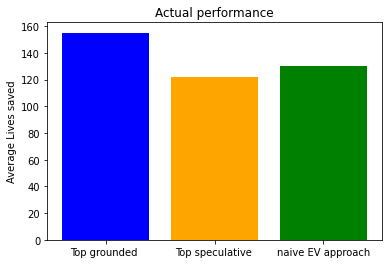

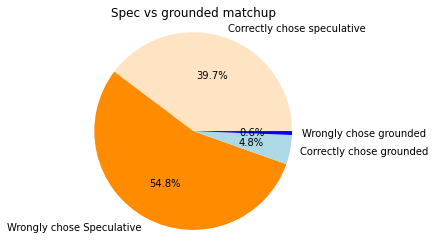

In [16]:
# Explore on your own by adjusting the parameters below and running. 


# Number of interventions
num_interv = 15

# grounded charity features:

grounded_mean = 0
grounded_std_dev = 100
grounded_error_mean = 0
grounded_error_std_dev = 50
    
# speculative charity features:
spec_mean = 0
spec_std_dev = 130
spec_error_mean = 0
spec_error_std_dev = 200

downweight = False  # Use downweight = True to test bayesian method

import numpy as np
import matplotlib.pyplot as plt

def createsample(mean, std_dev, numsamples):
    return np.random.normal(mean, std_dev, numsamples)
    #return cauchy.rvs(loc=mean, scale=scale, size=numsamples)


def downweight(est_effs,alphai):
    prior=0
    adjusted_est_effs = []
    for est_effect in est_effs:
        adjusted_estimate = alphai*est_effect+(1-alphai)*prior
        adjusted_est_effs.append(adjusted_estimate)
    return(adjusted_est_effs)

def onerunwithspec(num_interv,grounded_mean,grounded_std_dev,grounded_error_mean,grounded_error_std_dev,spec_mean,spec_std_dev,spec_error_mean,spec_error_std_dev,plotgraph=True,downweight=False):

    def createsample(mean, std_dev, numsamples):
        return np.random.normal(mean, std_dev, numsamples)
    

    
    alphai_grounded = 1/(1+(grounded_error_std_dev/grounded_std_dev)**2)#Taken from the paper

    #might be easiest to remove sorted when doing the speculative
    
    interv_effs = sorted(createsample(grounded_mean, grounded_std_dev, num_interv)) #generate actual intervention 
    errors = createsample(grounded_error_mean, grounded_error_std_dev, num_interv) #generate errors for each
    est_effs = interv_effs+errors  # estimated effect

    if downweight == True:
        est_effs=downweight(est_effs,alphai_grounded)
    
    

    #might be easiest to remove sorted when doing the speculative
    
    spec_interv_effs = sorted(np.random.normal(spec_mean, spec_std_dev, num_interv)) #generate actual intervention 
    
    # TEST WHERE BOTH ARE THE SAME:
    #spec_interv_effs = interv_effs
    
    spec_errors = np.random.normal(spec_error_mean, spec_error_std_dev, num_interv) #generate errors for each
    spec_est_effs = spec_interv_effs+spec_errors  # estimated effect
    
    alphai_spec = 1/(1+(spec_error_std_dev/spec_std_dev)**2)#Taken from the paper
    
    if downweight == True:
        spec_est_effs=downweight(spec_est_effs,alphai_spec)
    

    #estimatestdev = np.sqrt(actual_std_dev**2 + error_std_dev**2)
    #print("stdis = ",estimatestdev, np.std(est_effs))
    
    if plotgraph == True: 
        fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 5), 
                                gridspec_kw={'width_ratios': [3, 1]})
        bestintindex = np.argmax(spec_est_effs)
        ax.scatter(interv_effs,est_effs)
        ax.scatter(spec_interv_effs,spec_est_effs)
        
        
        
        linelimhi = max(est_effs)
        linelimlow = min(est_effs)
        
        min_val = linelimhi
        max_val = linelimlow
        ax.plot([min_val, max_val], [min_val, max_val], linestyle='--')
    
        #ax.set_title('Estimate of top charity')
        ax.set_xlabel('Actual effect', fontsize=12, fontweight='bold')
        ax.set_ylabel('Estimated effect', fontsize=12, fontweight='bold')
        
        bin_width = 20
        bins = np.arange(np.min([est_effs, spec_est_effs]),
                    np.max([est_effs, spec_est_effs]) + bin_width, bin_width)
        
        ax2.hist(est_effs, bins=bins, orientation='horizontal', alpha=0.7, 
        color='steelblue', edgecolor='black', linewidth=0.5)
        ax2.set_xlabel('Frequency', fontsize=12)

        ax2.set_title('Observed ranking', fontsize=12, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='x')
        
        
        ax2.hist(spec_est_effs, bins=bins, orientation='horizontal',weights=-np.ones_like(spec_est_effs), alpha=0.7, 
        color='orange', edgecolor='black', linewidth=0.5)
        ax2.set_title('Observed ranking', fontsize=12, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='x')
        ax2.axhline(y=0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
        
        ax2.axhline(y=0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
        plt.show()


    
    top_charity_index = np.argmax(est_effs)
    top_charity_esteff=est_effs[top_charity_index]
    top_charity_acteff=interv_effs[top_charity_index]
    overestimate = top_charity_esteff-top_charity_acteff
    top_charity_acteff=interv_effs[top_charity_index]
    
    spec_top_charity_index = np.argmax(spec_est_effs)
    spec_top_charity_esteff=spec_est_effs[spec_top_charity_index]
    spec_top_charity_acteff=spec_interv_effs[spec_top_charity_index]
    spec_overestimate = spec_top_charity_esteff-top_charity_acteff
    spec_top_charity_acteff=spec_interv_effs[spec_top_charity_index]
    
    #return(top_charity_index,top_charity_esteff,top_charity_acteff,100*overestimate/top_charity_acteff)
    return(top_charity_esteff,top_charity_acteff,spec_top_charity_esteff,spec_top_charity_acteff)





top_charity_esteff,top_charity_acteff,spec_top_charity_esteff,spec_top_charity_acteff = onerunwithspec(num_interv,grounded_mean,grounded_std_dev,grounded_error_mean,grounded_error_std_dev,spec_mean,spec_std_dev,spec_error_mean,spec_error_std_dev,True,downweight)



nonspec_lives_saved = 0
spec_lives_saved = 0
False_spec_tally = 0
False_nonspec_tally = 0
True_spec_tally =0
True_nonspec_tally=0
Actual_effects_reg = []
Actual_effects_spec = []
naiveEV_lives_saved = 0
num_runs = 10000
#spec_error_std_dev = 500

for i in range(0,num_runs):
    top_charity_esteff,top_charity_acteff,spec_top_charity_esteff,spec_top_charity_acteff = onerunwithspec(num_interv,grounded_mean,grounded_std_dev,grounded_error_mean,grounded_error_std_dev,spec_mean,spec_std_dev,spec_error_mean,spec_error_std_dev,False,downweight)
    specwinsapparent = (spec_top_charity_esteff>top_charity_esteff)
    specwinsactual = (spec_top_charity_acteff>top_charity_acteff)
    #print(specwinsapparent,specwinsactual)
    if specwinsapparent and not specwinsactual:
        False_spec_tally += 1
    elif not specwinsapparent and specwinsactual:
        False_nonspec_tally += 1
    elif specwinsapparent and  specwinsactual:
        True_spec_tally += 1
    elif not specwinsapparent and not  specwinsactual:
        True_nonspec_tally += 1
    nonspec_lives_saved += top_charity_acteff
    spec_lives_saved += spec_top_charity_acteff
    if specwinsapparent:
        naiveEV_lives_saved+=spec_top_charity_acteff
    else:
        naiveEV_lives_saved+=top_charity_acteff
    
    
    Actual_effects_reg.append(top_charity_acteff)
    Actual_effects_spec.append(spec_top_charity_acteff)
    #if specwinsapparent:
    #    Actual_effects_naiveEV.append(spec_top_charity_acteff)
    #else:
    #    Actual_effects_naiveEV.append(spec_top_charity_acteff)
    
print("nonspec, spec",nonspec_lives_saved/num_runs,spec_lives_saved/num_runs)
print("num_runs,False_spec_tally,False_nonspec_tally",num_runs,False_spec_tally,False_nonspec_tally)


plt.bar(["Top grounded ","Top speculative ","naive EV approach"],[nonspec_lives_saved/num_runs,spec_lives_saved/num_runs,naiveEV_lives_saved/num_runs],color=["blue","orange","green"])

plt.title('Actual performance')

#plt.xlabel('lives saved')
plt.ylabel('Average Lives saved')

#print(np.median(overestimatelist))


values = [True_spec_tally,False_spec_tally,True_nonspec_tally,False_nonspec_tally]
labels = ['Correctly chose speculative', 'Wrongly chose Speculative','Correctly chose grounded','Wrongly chose grounded']


# Create pie chart
plt.figure()
plt.pie(values, labels=labels, autopct='%1.1f%%',colors=["bisque","darkorange","lightblue","blue"]) #, startangle=50
plt.title('Spec vs grounded matchup')

# Ensure pie is drawn as a circle
plt.axis('equal')

plt.show()


